# Fundamentals of Machine Learning - Exercise 9
Dominique Cheray & Manuel Krämer

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn import decomposition
from sklearn import preprocessing

digits = load_digits()
X = digits["data" ]/255.
Y = digits["target"]

## 4 Implementation - Non-negative matrix factorization

In [2]:
def non_negative(data, num_components):
    
    X = data
    p = num_components
    m,n = data.shape
    
    #initialize H and W with positive normal random distribution
    H = np.absolute(np.random.standard_normal(size=(p,n)))
    W = np.absolute(np.random.standard_normal(size=(m,p)))
    
    # Iteration limit
    limit = 1000
    
    for i in range(limit):
        H = H * (np.dot(W.T,X)) / np.clip((np.dot(W.T,np.dot(W,H))), a_min = 0.01, a_max = None)
        W = W * (np.dot(X,H.T)) / np.clip((np.dot(W, np.dot(H,H.T))), a_min = 0.01, a_max = None)
    
    return W, H

In [3]:
W, H = non_negative(X, 10)
print(W.shape,H.shape)

(1797, 10) (10, 64)


In [4]:
model = decomposition.NMF(n_components=10, init='random', random_state=0)
W_skl = model.fit_transform(X)
H_skl = model.components_


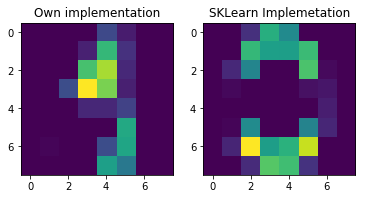

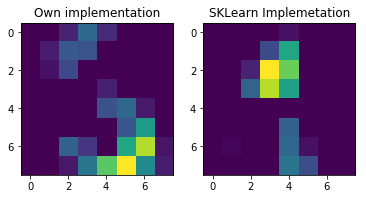

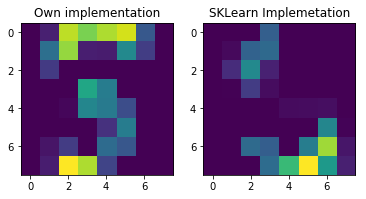

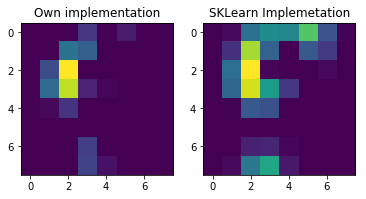

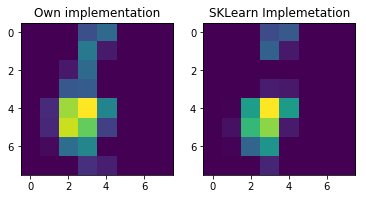

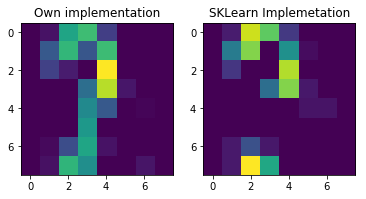

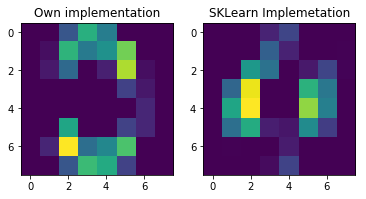

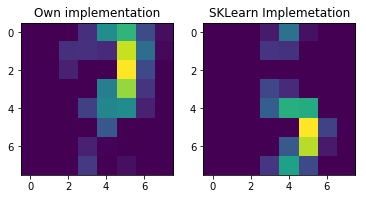

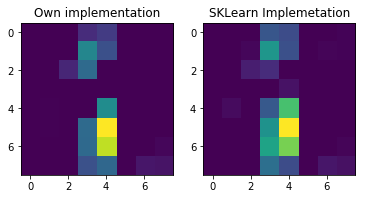

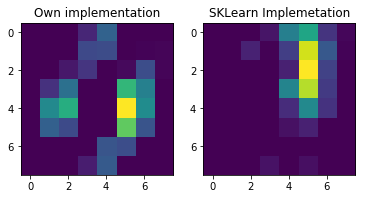

In [5]:
for i in range(10):
    fig = plt.figure()
    a=fig.add_subplot(1,2,1)
    plt.imshow(H[i,:].reshape(8,8))
    a.set_title('Own implementation')
    a=fig.add_subplot(1,2,2)
    plt.imshow(H_skl[i,:].reshape(8,8))
    a.set_title('SKLearn Implemetation')
    plt.show()

The results are comparable, although there are some images that don't look similar. This might be the case, because of the random initialization of W and H: The NMF is not unique but you can see prototypical parts of the numbers.

## 5 Recommender System

In [6]:
import pandas as pd 

# column headers for the dataset
ratings_cols = ['user id','movie id','rating','timestamp']
movies_cols = ['movie id','movie title','release date',
'video release date','IMDb URL','unknown','Action',
'Adventure','Animation','Childrens','Comedy','Crime',
' Documentary','Drama','Fantasy','Film-Noir','Horror',
'Musical','Mystery','Romance','Sci-Fi','Thriller',
'War' ,'Western']
users_cols = ['user id','age','gender','occupation',
'zip code']

users = pd.read_csv('ml-100k/u.user', sep ='|',
                    names = users_cols, encoding ='latin-1')
movies = pd.read_csv('ml-100k/u.item', sep='|',
                    names = movies_cols , encoding ='latin-1')
ratings = pd.read_csv('ml-100k/u.data', sep ='\t',
                    names = ratings_cols , encoding ='latin-1 ')

# peek at the dataframes , if you like :)
users.head()
movies.head()
ratings.head()

# create a joint ratings dataframe for the matrix
fill_value = 0
rat_df = ratings.pivot(index = 'user id',
columns ='movie id', values = 'rating').fillna(fill_value)
rat_df.head()

movie id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
W, H = non_negative(rat_df, 30)
print(rat_df.shape, W.shape,H.shape)

(943, 1682) (943, 30) (30, 1682)


In [8]:
def recommend_movies(reconstruction, user_id, movies, ratings):
    rec = reconstruction.iloc[user_id].as_matrix()
    ratings = ratings.as_matrix()
    rec_sort_idx = np.argsort(rec)[::-1]
        
    rec_idx = np.where(ratings[user_id-1, rec_sort_idx] == 0)[0][0]
    
    print("Recommended film based on your ratings: " + movies.iloc[rec_idx].at['movie title'] +
          " " + movies.iloc[rec_idx].at['IMDb URL'])

reconstruction = pd.DataFrame(W @ H, columns = rat_df.columns)
for i in range(200):
    predictions = recommend_movies(reconstruction, i+1, movies, rat_df)


Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: Four Rooms (1995) http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)
Recommended film based on your ratings: Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)
Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: GoldenEye (1995) http://us.imdb.com/M/title-exact?GoldenEye%20(1995)
Recommended film based on your ratings: GoldenEye (1995) http://us.imdb.com/M/title-exact?GoldenEye%20(1995)
Recommended film based on your ratings: Muppet Treasure Island (1996) http://us.imdb.com/M/title-exact?Muppet%20Treasure%20Island%20(1996)
Recommended film based on your ratings: Four Rooms (1995) http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)
Recommended film based on your ratings: G

Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: Four Rooms (1995) http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)
Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)
Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: Twelve Monkeys (1995) http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995)
Recommended film based on your ratings: Toy Story (1995) 

In [9]:
W, H = non_negative(rat_df, 30)
reconstruction = pd.DataFrame(W @ H, columns = rat_df.columns)
for i in range(200):
    predictions = recommend_movies(reconstruction, i+1, movies, rat_df)

Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: Get Shorty (1995) http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)
Recommended film based on your ratings: Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)
Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: GoldenEye (1995) http://us.imdb.com/M/title-exact?GoldenEye%20(1995)
Recommended film based on your ratings: Muppet Treasure Island (1996) http://us.imdb.com/M/title-exact?Muppet%20Treasure%20Island%20(1996)
Recommended film based on your ratings: Get Shorty (1995) http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)
Recommended film based on your ratings:

The random initialization has an influence on the recommendation. 
If I run the NMF several times with the same number of components, the recommendation changes. One reason could be that the NMF is not a unique factorization and the results can be different.

In [10]:
# Try the recommendation with 100 components
W, H = non_negative(rat_df, 100)
print(rat_df.shape, W.shape,H.shape)
reconstruction = pd.DataFrame(W @ H, columns = rat_df.columns)
for i in range(200):
    predictions = recommend_movies(reconstruction, i+1, movies, rat_df)

(943, 1682) (943, 100) (100, 1682)
Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: Copycat (1995) http://us.imdb.com/M/title-exact?Copycat%20(1995)
Recommended film based on your ratings: GoldenEye (1995) http://us.imdb.com/M/title-exact?GoldenEye%20(1995)
Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: Four Rooms (1995) http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)
Recommended film based on your ratings: Braveheart (1995) http://us.imdb.com/M/title-exact?Braveheart%20(1995)
Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title

Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: Four Rooms (1995) http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)
Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: GoldenEye (1995) http://us.imdb.com/M/title-exact?GoldenEye%20(1995)
Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
Recommended film based on your ratings: Four Rooms (1995) http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)
Recommended film based on your ratings: Toy Story (1995) http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)

Here one can see that the choose of the number of parameters has an influence on the recommendation. 


### Try to find prototypical users

In [11]:
comp = 10
W, H = non_negative(rat_df, comp)

In [12]:
movies_cols = np.array(movies_cols)
H_sorted = np.argsort(H, axis = 1)[:,::-1]

for c in range(comp):
    print("Top ten genres of prototypical user {}:".format(c+1))
    a = H_sorted[c,0:9]
    for idx in a:
        print(movies_cols[movies.iloc[idx].as_matrix() == 1])

Top ten genres of prototypical user 1:
['Action' 'Crime' 'Drama']
['Drama' 'War']
['Drama']
['Drama']
['Drama' 'Thriller']
['Action' 'Adventure']
['Action' 'Crime' 'Drama']
['Comedy' 'Romance' 'War']
['Crime' 'Drama']
Top ten genres of prototypical user 2:
['Action' 'Adventure' 'Romance' 'Sci-Fi' 'War']
['Action' 'Adventure' 'Romance' 'Sci-Fi' 'War']
['Action' 'Adventure' 'Comedy' 'Romance']
['Action' 'Adventure' 'Sci-Fi']
['Action' 'Adventure']
['Action' 'Adventure' 'Sci-Fi']
['Action' 'Adventure' 'Drama' 'Romance' 'Sci-Fi' 'War']
['Comedy']
['movie id' 'Animation' 'Childrens' 'Comedy']
Top ten genres of prototypical user 3:
['Comedy' 'Romance']
['Drama']
['Comedy' 'Romance']
['Drama']
['Comedy' 'Romance']
['Drama']
['Drama' 'War']
['Comedy' 'Romance']
['Drama']
Top ten genres of prototypical user 4:
['Action' 'Drama' 'Romance']
['Action' 'Thriller']
['Drama' 'Sci-Fi']
['Crime' 'Film-Noir' 'Mystery' 'Thriller']
['Action' 'Mystery' 'Romance' 'Thriller']
['Drama' 'Romance' 'War']
['Dram

Here one can see that there are several prototypical users e.g. :
- User 1 likes action movies
- User 3 likes crime and thriller
- User 5 likes comedy and romance
- User 7 likes animation and children
- etc.